<a href="https://colab.research.google.com/github/196883/Bayes_model/blob/tt_branch/scr/PyMC/GaussProcessRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gauss Process Regression

ガウス過程回帰は、観測点$y$がある潜在函数$f$に従って生成されると仮定したうえで用いられるノンパラメトリックな回帰手法である。

ここで、潜在函数$f$は多変数正規分布(Gauss過程)によってモデリングされる:
\begin{equation}
f(x) \sim\ \mathcal{GP}(m(x;\theta),k(x,x';\theta))\ .
\end{equation}
ここで、$m(x;\theta)$は平均函数、$k(x,x';\theta)$は共分散函数である。
多くの例において、平均函数はしばしば$0$に設定され、分散だけで説明されることが多い。

又、$\theta$は平均函数、共分散函数の両方に共通するハイパーパラメータであり、周辺尤度最大化によって評価することができる。

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import pymc3 as pm
import scipy as sp
import theano
import theano.tensor as tt
import theano.tensor.nlinalg
import sys, os, io
%matplotlib inline
cm = cmap.inferno

In [0]:
np.random.seed(777)
n = 20
X = np.sort(3 * np.random.rand(n))[:,None]

with pm.Model() as model:
    #f(x)
    l_true = 0.3
    s2_f_true = 1.0
    cov = s2_f_true * pm.gp.cov.ExpQuad(1,l_true)
    
    #noise, epsilon
    s2_n_true = 0.1
    K_noise = s2_n_true ** 2 * tt.eye(n)
    K = cov(X) + K_noise    

ここで、潜在函数$f$を実装する際に使用した`pm.gp.cov.ExpQuad`は、Gauss過程の共分散函数$k$を
\begin{equation}
k(x,x') = \exp\left[-\dfrac{(x - x')^{2}}{2l^{2}}\right]
\end{equation}
と設定することを意味する。

コード中の`l_true`は、代入式を見てもわかるように、上記指数型の共分散函数の分散項に対応する部分を与えており、`s2_f_true`は共分散函数に掛けるスケールファクターの役割を果たす。

`theano.tensor.tt.eye(n,m,k)`は対角成分の第$k$成分以外がゼロの$n$行$m$列の行列を表す。

## Sampleデータの生成とプロット

In [0]:
#指定したハイパーパラメータに対し、共分散を評価する(20次元のベクトル)
K = theano.function([], cov(X) + K_noise)()

#多重正規乱数を生成する
y = np.random.multivariate_normal(np.zeros(n), K)

Text(0, 0.5, 'f(x)')

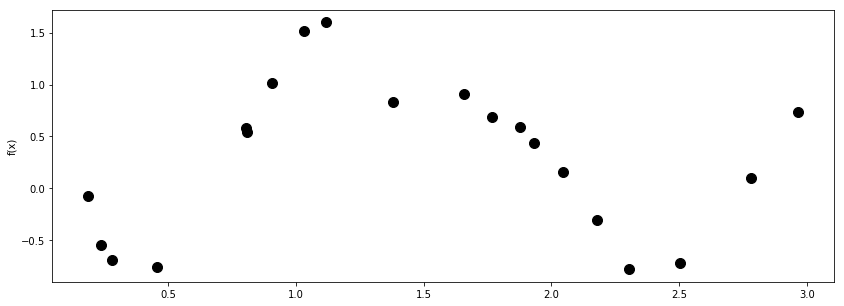

In [15]:
#上記疑似データを生成
fig = plt.figure(figsize = (14, 5))
ax = fig.add_subplot(111)
ax.plot(X, y, 'ok', ms = 10)
ax.set_ylabel("f(x)")

## 周辺分布(尤度函数)$p(y\mid X)$について

周辺分布$p(y\mid X)$は次のように、$p(y\mid f,X)$と$p(f\mid X)$を用いて、次のように書くことができる:
\begin{equation}
p(y\mid X) = \int p(y\mid f,X)p(f\mid X)df\ .
\end{equation}
この周辺分布の計算は、次のコードであらわされる:

In [0]:
Z = np.linspace(0,3,100)[:,None]  #3までの数字を百分割で生成

with pm.Model() as model:
    #Gauss過程の定義に使用される共分散函数kに含まれるハイパーパラメータの事前分布
    l = pm.Uniform('l', 0, 10)
    
    #
    log_s2_f = pm.Uniform('log_s2_f', lower = -10, upper = 5)
    s2_f = pm.Deterministic('s2_f', tt.exp(log_s2_f))
    
    

In [17]:
Z

array([[0.        ],
       [0.03030303],
       [0.06060606],
       [0.09090909],
       [0.12121212],
       [0.15151515],
       [0.18181818],
       [0.21212121],
       [0.24242424],
       [0.27272727],
       [0.3030303 ],
       [0.33333333],
       [0.36363636],
       [0.39393939],
       [0.42424242],
       [0.45454545],
       [0.48484848],
       [0.51515152],
       [0.54545455],
       [0.57575758],
       [0.60606061],
       [0.63636364],
       [0.66666667],
       [0.6969697 ],
       [0.72727273],
       [0.75757576],
       [0.78787879],
       [0.81818182],
       [0.84848485],
       [0.87878788],
       [0.90909091],
       [0.93939394],
       [0.96969697],
       [1.        ],
       [1.03030303],
       [1.06060606],
       [1.09090909],
       [1.12121212],
       [1.15151515],
       [1.18181818],
       [1.21212121],
       [1.24242424],
       [1.27272727],
       [1.3030303 ],
       [1.33333333],
       [1.36363636],
       [1.39393939],
       [1.424